In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Collection

In [26]:
intra = pd.read_csv('Great Britain  - Intraday.csv')
ahead = pd.read_csv('Great Britain  - Day AHead.csv')

intra.head()

,Date,Time,Intraday Price,Volume,DateTime
0,8/31/2024,23:00,81.41,1392.60,08/31/2024 23:00
1,8/31/2024,23:30,80.75,1239.45,08/31/2024 23:30
2,9/1/2024,00:00,72.59,1685.05,09/01/2024 00:00
3,9/1/2024,00:30,70.94,1669.60,09/01/2024 00:30
4,9/1/2024,01:00,70.27,1496.75,09/01/2024 01:00


In [27]:
ahead.head()

,Date,Time,Day Ahead Price
0,9/1/2024,00:00,77.2380
1,9/1/2024,01:00,74.9280
2,9/1/2024,02:00,74.9280
3,9/1/2024,03:00,73.7268
4,9/1/2024,04:00,71.0220


In [28]:
data = intra.merge(ahead, on=['Date', 'Time'], how='left')
data.sample(10)

,Date,Time,Intraday Price,Volume,DateTime,Day Ahead Price
245,9/6/2024,01:30,76.43,2526.90,09/06/2024 01:30,NaN
224,9/5/2024,15:00,82.04,3207.05,09/05/2024 15:00,74.7684
59,9/2/2024,04:30,97.80,1519.55,09/02/2024 04:30,NaN
102,9/3/2024,02:00,82.74,1268.55,09/03/2024 02:00,84.0000
236,9/5/2024,21:00,81.51,2105.40,09/05/2024 21:00,71.0220
241,9/5/2024,23:30,82.43,2258.10,09/05/2024 23:30,NaN
305,9/7/2024,07:30,89.45,1050.05,09/07/2024 07:30,NaN
97,9/2/2024,23:30,84.78,1203.30,09/02/2024 23:30,NaN
263,9/6/2024,10:30,92.37,3245.75,09/06/2024 10:30,NaN
130,9/3/2024,16:00,99.02,2172.90,09/03/2024 16:00,106.6128


In [5]:
data.isna().sum()

Date                 0
Time                 0
Intraday Price       0
Volume               0
DateTime             0
Day Ahead Price    194
dtype: int64

In [29]:
data['Day Ahead Price'] = data['Day Ahead Price'].fillna(method='bfill')
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data = data[data['Date']!='8/31/2024']
data.head(10)

,Date,Time,Intraday Price,Volume,DateTime,Day Ahead Price
2,9/1/2024,00:00,72.59,1685.05,2024-09-01 00:00:00,77.2380
3,9/1/2024,00:30,70.94,1669.60,2024-09-01 00:30:00,74.9280
4,9/1/2024,01:00,70.27,1496.75,2024-09-01 01:00:00,74.9280
5,9/1/2024,01:30,70.32,1401.25,2024-09-01 01:30:00,74.9280
6,9/1/2024,02:00,74.60,1601.90,2024-09-01 02:00:00,74.9280
7,9/1/2024,02:30,70.66,1755.70,2024-09-01 02:30:00,73.7268
8,9/1/2024,03:00,72.32,1944.55,2024-09-01 03:00:00,73.7268
9,9/1/2024,03:30,72.02,1903.20,2024-09-01 03:30:00,71.0220
10,9/1/2024,04:00,70.57,1742.00,2024-09-01 04:00:00,71.0220
11,9/1/2024,04:30,67.82,1906.00,2024-09-01 04:30:00,73.9200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 2 to 385
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             384 non-null    object        
 1   Time             384 non-null    object        
 2   Intraday Price   384 non-null    float64       
 3   Volume           384 non-null    float64       
 4   DateTime         384 non-null    datetime64[ns]
 5   Day Ahead Price  383 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 21.0+ KB


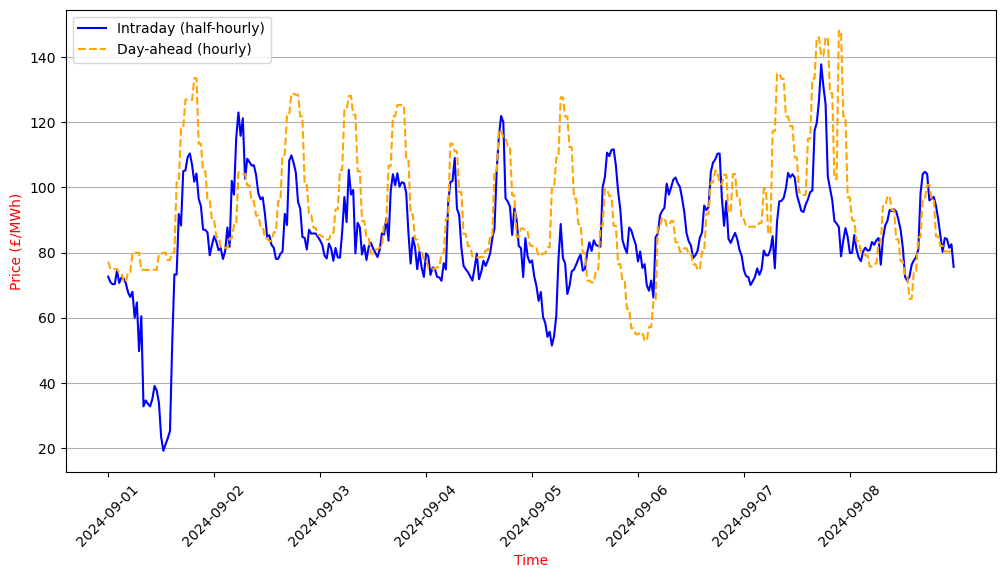

In [5]:
# Assuming 'data' is a DataFrame that contains the necessary columns
plt.figure(figsize=(12, 6))  # Set the figure size for the plot

plt.plot(data['DateTime'], data['Intraday Price'], label='Intraday (half-hourly)', color='blue')
plt.plot(data['DateTime'], data['Day Ahead Price'], label='Day-ahead (hourly)', linestyle='--', color='orange')

plt.ylabel('Price (£/MWh)', color='red')
plt.xlabel('Time', color='red')
plt.legend()
plt.grid(axis='y')

# Extracting unique dates from the 'Date' column and converting them to datetime format for x-ticks
unique_dates = pd.to_datetime(data['Date']).unique()

plt.xticks(unique_dates, rotation=45)
plt.show()

# Data Analysis

In [7]:
df = data.copy()

In [8]:
# Calculate returns
df['Intraday Return'] = df['Intraday Price'].pct_change()
df['Day Ahead Return'] = df['Day Ahead Price'].pct_change()

# Calculate daily volatility (standard deviation of returns)
daily_volatility = df.groupby(df['DateTime'].dt.date).agg({
    'Intraday Return': 'std',
    'Day Ahead Return': 'std'
}).rename(columns={
    'Intraday Return': 'Intraday Volatility',
    'Day Ahead Return': 'Day Ahead Volatility'
})

print(daily_volatility)

            Intraday Volatility  Day Ahead Volatility
DateTime                                             
2024-09-01             0.204191              0.060323
2024-09-02             0.074829              0.055502
2024-09-03             0.074819              0.069475
2024-09-04             0.084331              0.070438
2024-09-05             0.079084              0.072980
2024-09-06             0.065813              0.071393
2024-09-07             0.062950              0.113818
2024-09-08             0.053961              0.055985


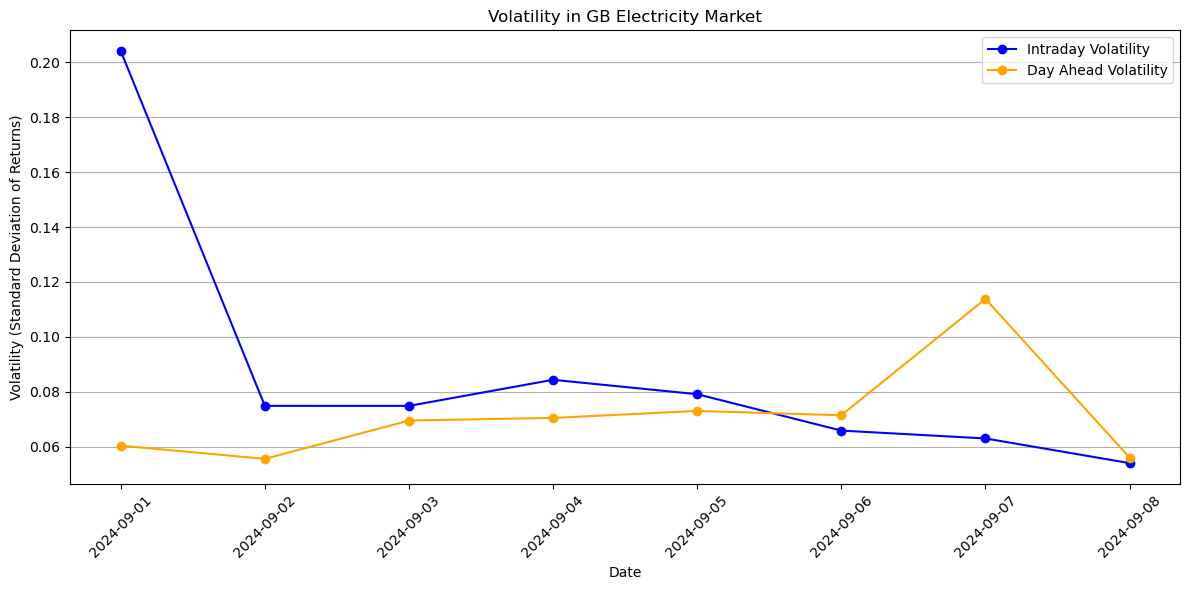

In [9]:
# Plotting the volatility
plt.figure(figsize=(12, 6))
plt.plot(daily_volatility.index, daily_volatility['Intraday Volatility'], marker='o', label='Intraday Volatility', color='blue')
plt.plot(daily_volatility.index, daily_volatility['Day Ahead Volatility'], marker='o', label='Day Ahead Volatility', color='orange')

plt.title('Volatility in GB Electricity Market')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Group by date and calculate standard deviation of returns
daily_volatility = df.groupby(df['DateTime'].dt.date)['Intraday Return'].std()

# Define a threshold for high volatility (e.g., mean + std dev)
mean_volatility = daily_volatility.mean()
std_volatility = daily_volatility.std()
high_volatility_threshold = mean_volatility + std_volatility

# Identify high volatility days
high_volatility_days = daily_volatility[daily_volatility > high_volatility_threshold]

# Print results
print("Daily Volatility:")
print(daily_volatility)
print("\nHigh Volatility Days (Standard Deviation > Threshold):")
print(high_volatility_days)

Daily Volatility:
DateTime
2024-09-01    0.204191
2024-09-02    0.074829
2024-09-03    0.074819
2024-09-04    0.084331
2024-09-05    0.079084
2024-09-06    0.065813
2024-09-07    0.062950
2024-09-08    0.053961
Name: Intraday Return, dtype: float64

High Volatility Days (Standard Deviation > Threshold):
DateTime
2024-09-01    0.204191
Name: Intraday Return, dtype: float64


# `Spread` Trading Strategy

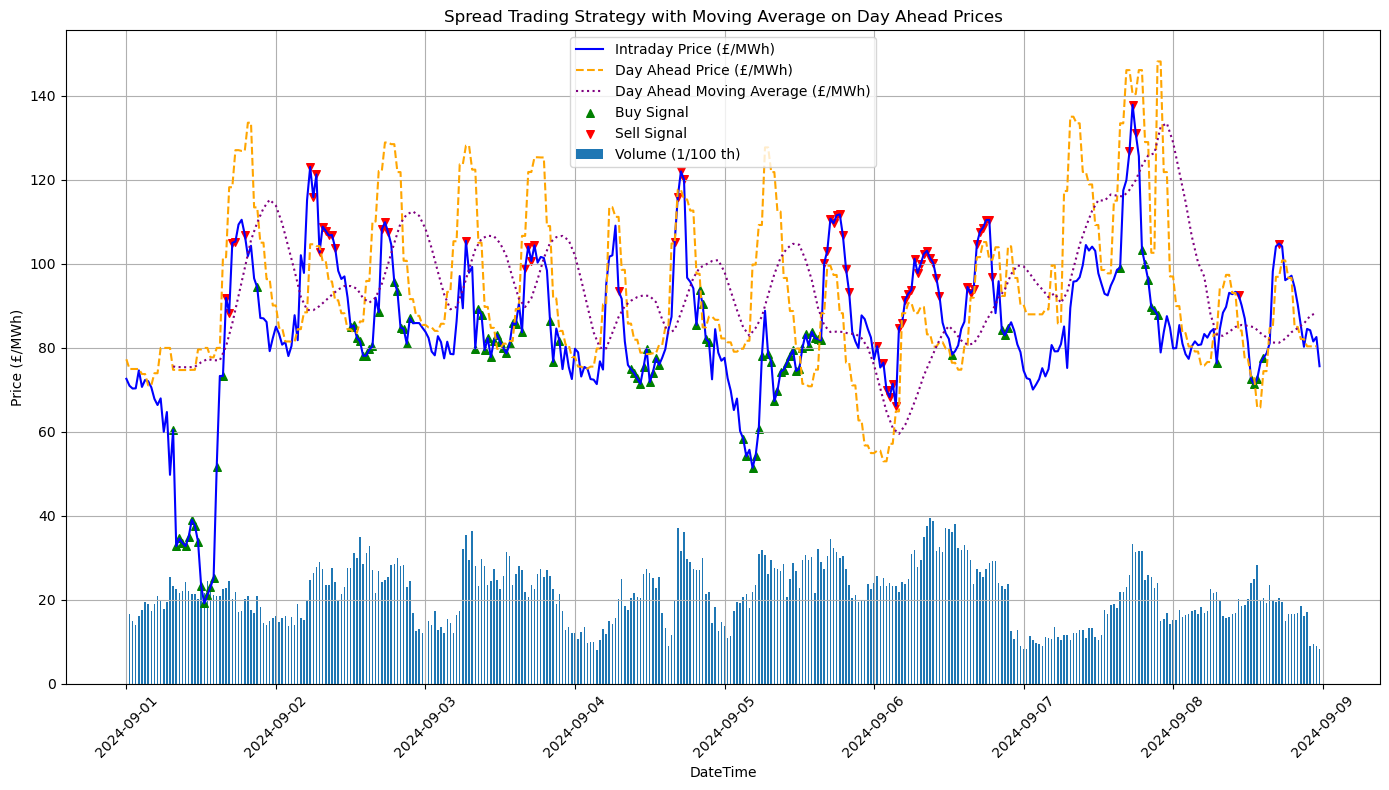

In [57]:
df = data.copy()
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Calculate moving average for Day Ahead Price (using a window of 16 periods for example)
df['Day Ahead MA'] = df['Day Ahead Price'].rolling(window=16).mean()

# Calculate spread between Intraday Price and Day Ahead Moving Average
df['Spread'] = df['Intraday Price'] - df['Day Ahead MA']

# Define thresholds for buy/sell signals based on spread
buy_threshold = -5   # Buy signal if spread is less than -£5
sell_threshold = 5    # Sell signal if spread is greater than £5

# Generate buy/sell signals based on spread
df['Signal'] = None
df.loc[(df['Spread'] < buy_threshold) & (df['Volume'] / 100 > 20), 'Signal'] = 'Buy'
# df.loc[df['Spread'] > sell_threshold, 'Signal'] = 'Sell'
df.loc[(df['Spread'] > sell_threshold) & (df['Volume'] / 100 > 20), 'Signal'] = 'Sell'

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df['DateTime'], df['Intraday Price'], label='Intraday Price (£/MWh)', color='blue')
plt.plot(df['DateTime'], df['Day Ahead Price'], label='Day Ahead Price (£/MWh)', color='orange', linestyle='--')
plt.plot(df['DateTime'], df['Day Ahead MA'], label='Day Ahead Moving Average (£/MWh)', color='purple', linestyle=':')
plt.bar(df['DateTime'], df['Volume']/100, width=0.01, label='Volume (1/100 th)')

# Mark Signals
buy_signals = df[df['Signal'] == 'Buy']
plt.scatter(buy_signals['DateTime'], buy_signals['Intraday Price'], marker='^', color='green', label='Buy Signal', s=30)
sell_signals = df[df['Signal'] == 'Sell']
plt.scatter(sell_signals['DateTime'], sell_signals['Intraday Price'], marker='v', color='red', label='Sell Signal', s=30)

# Adding labels and title
plt.title('Spread Trading Strategy with Moving Average on Day Ahead Prices')
plt.xlabel('DateTime')
plt.ylabel('Price (£/MWh)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [61]:
# Initialize variables for trading simulation
initial_amount = 1000
balance = initial_amount
position = None
print(f'Intial Amount: £{balance:.2f}\n')
# Simulate trading based on signals
for i in range(len(df)):
    if df['Signal'].iloc[i] == 'Buy' and position is None:
        # Buy at intraday price and set position
        position = df['Intraday Price'].iloc[i]
        volume_traded = df['Volume'].iloc[i] / 100 # Convert to MWh
        cost = position * volume_traded
        if cost <= balance:
            balance -= cost # Deduct cost from balance
            print(f"Bought at {position} for {cost}. Remaining balance: {balance:.2f}")
    elif df['Signal'].iloc[i] == 'Sell' and position is not None:
        # Sell at intraday price and calculate profit/loss
        profit = df['Intraday Price'].iloc[i] - position
        revenue = profit * (df['Volume'].iloc[i] / 100) # Convert to MWh
        balance += revenue # Add revenue to balance
        print(f"Sold at {df['Intraday Price'].iloc[i]} for {revenue}. New balance: {balance:.2f}")
        position = None # Exit position after selling

# Final balance after trading simulation
print(f"\nFinal Balance after Trading: £{balance:.2f}")

Intial Amount: £1000.00

Sold at 91.83 for 713.604565. New balance: 1713.60
Sold at 123.04 for 709.1737650000002. New balance: 2422.78
Bought at 84.9 for 2339.12235. Remaining balance: 83.66
Sold at 108.18 for 561.87444. New balance: 645.53
Sold at 105.44 for 347.7849600000001. New balance: 993.32
Sold at 99.02 for 418.28325. New balance: 1411.60
Sold at 93.45 for 143.96739. New balance: 1555.57
Bought at 74.85 for 1528.8860999999997. Remaining balance: 26.68
Sold at 105.16 for 607.6700350000001. New balance: 634.35
Sold at 100.12 for 402.91230000000013. New balance: 1037.26
Sold at 94.45 for 511.1750000000003. New balance: 1548.44
Sold at 126.73 for 1095.89588. New balance: 2644.33
Sold at 92.63 for -217.69980000000018. New balance: 2426.63
Bought at 72.53 for 1740.466145. Remaining balance: 686.17
Sold at 104.8 for 657.0010649999999. New balance: 1343.17

Final Balance after Trading: £1343.17
